In [169]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



In [171]:
# Defino los componentes principales
componentes = None # puede ser None o un número entero o un float entre 0 y 1 que representa la varianza acumulada que se quiere explicar

In [172]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [173]:
df = load_data_prep()

In [174]:
# Variable a predecir
target = 'label'

# Construcción de la matriz de features
X = df.drop(['cod', 'label'], axis=1)

# Construcción del vector a predecir
y = df[target].values

print('Dimensión de la matriz de features: {}'.format(X.shape))
print('Dimensión del vector a predecir: {}'.format(y.shape))
print('Vector a predecir: {}'.format(y))

Dimensión de la matriz de features: (67, 290)
Dimensión del vector a predecir: (67,)
Vector a predecir: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [175]:
# Solo por esta vez para a fijar la semilla de numeros aleatorios
# para que se separe siempre igual cada vez que corramos esta notebook 
random_seed = 123475

# Creacion de las matrices de entrenamiento y testeo. Aca fijamos la semilla para que siempre separe igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (60, 290)
Dimensión de la matriz de features para testeo: (7, 290)


In [176]:
from pyod.models.knn import KNN
import pandas as pd

clf = KNN(contamination=0.18)
clf.fit(X_train)
y_pred = clf.predict(X_train)
X_train[y_pred == 1]

,afsl_ad,afsl_area_of_end_region_1,afsl_area_of_end_region_2,afsl_branch_volume,afsl_curl,afsl_diameter,afsl_dti_fa,afsl_elongation,afsl_irregularity,afsl_irregularity_of_end_region_1,...,ufsr_radius_of_end_region_1,ufsr_radius_of_end_region_2,ufsr_rd,ufsr_rdi,ufsr_span,ufsr_total_area_of_end_regions,ufsr_total_radius_of_end_regions,ufsr_total_surface_area,ufsr_trunk_volume,ufsr_volume
39,1.22620,2788.980,1149.670,10525.200,4.21163,15.58590,0.488072,8.52971,7.82846,0.303568,...,10.48900,9.10473,0.758294,0.264399,12.2506,2038.850,19.5938,19926.30,8272.920,12505.30
45,1.19575,195.855,189.000,560.145,3.38769,6.72547,0.457860,14.12410,4.05461,0.222760,...,9.01295,8.10719,0.661220,0.157765,10.1511,2151.470,17.1201,19828.40,8697.920,12220.40
14,1.13567,332.954,292.803,3584.150,3.21361,9.71499,0.344748,7.82723,5.95794,0.957035,...,9.40577,8.03464,0.749088,0.147120,14.0752,1626.580,17.4404,18378.10,7207.460,10599.70
7,1.23027,2619.560,1368.050,4257.890,3.95942,17.69100,0.457784,6.38062,8.11078,0.240842,...,6.74187,5.92818,0.611159,0.393248,14.4671,254.612,12.6700,5450.65,582.669,1797.95
43,1.09484,911.705,298.679,7185.920,4.42760,12.09210,0.438853,7.24803,6.86665,0.446471,...,6.66949,9.34899,0.826729,0.466856,11.7446,1217.240,16.0185,15449.00,5350.760,8407.08
2,1.23390,478.866,827.487,1825.370,3.77463,11.91100,0.471517,6.58314,5.29834,0.360349,...,8.95602,8.21973,0.826684,0.176348,10.6707,933.249,17.1757,12013.70,2729.240,6178.25
22,1.17078,843.156,963.607,962.628,3.86293,11.05790,0.529329,12.24610,5.17589,0.193994,...,8.91259,10.48190,0.650707,0.415991,12.2072,2682.230,19.3945,19670.70,9502.890,12620.90


In [177]:
# borro los outliers
indicador = X_train[y_pred == 1].index
X_train.drop(indicador, axis=0, inplace=True)

In [178]:
print('Dimensiones de la matriz de features: {}'.format(X_train.shape))

Dimensiones de la matriz de features: (53, 290)


In [179]:
y_train = np.delete(y_train, indicador)

In [180]:
y_train.shape

(53,)

Usamos standarscaler para normalizar los datos con distribución gaussiana y podamos detectar outliers, se usa para centrar las columnas de características en la media 0 con una desviación estándar de 1 para que las columnas de características tengan los mismos parámetros que una distribución normal estándar. En uso PCA es recomendable usar standarscaler o kmeans
Usamos minimaxscaler para normalizar los datos,es útil cuando los datos se necesitan en los intervalos acotados, con distribución uniforme.
Fuente: 
https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

In [181]:

std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

# Ajustamos el estandarizador
std_scale.fit(X_test)
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_test_scaled = std_scale.transform(X_test)
X_scaled = std_scale.transform(X_train)

In [182]:
# Busco una cantidad de componentes que me expliquen el 91% de la varianza y 
# usar descomposición de valor único (SVD) para calcular los vectores propios
pca = PCA(n_components=componentes, svd_solver='full')
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_scaled.shape, X_pca.shape)

Dimensiones de la matriz en componentes principales: (53, 53)
(53, 290) (53, 53)


Text(0.5, 0, 'Cantidad de componentes principales')

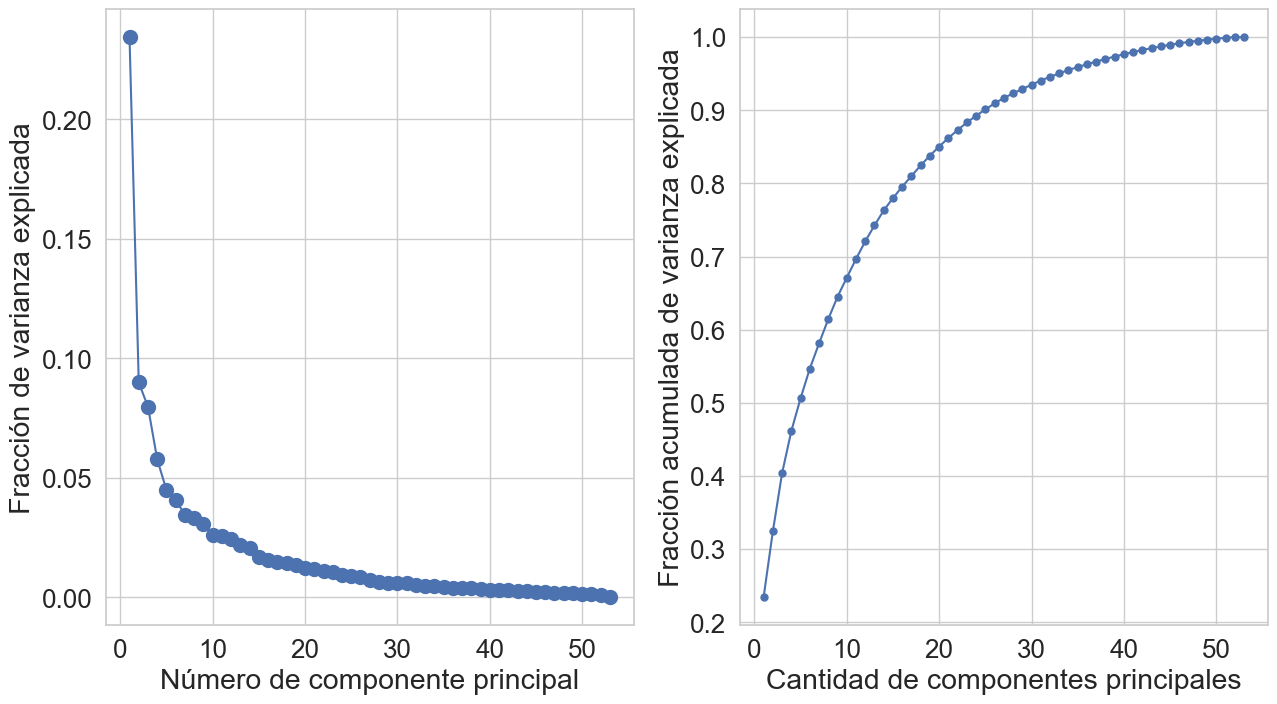

In [183]:

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 10)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

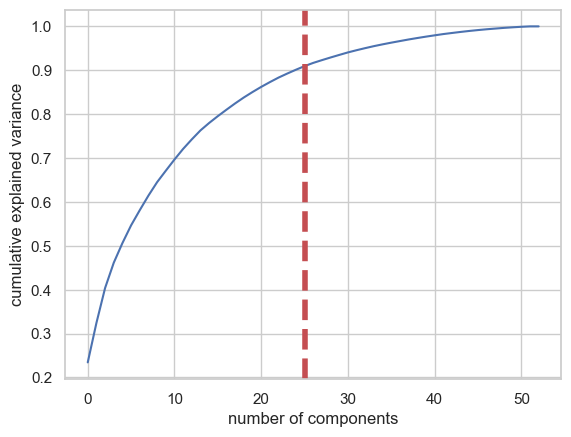

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.234338,0.234338
1,0.324151,0.089813
2,0.403778,0.079627
3,0.461409,0.057631
4,0.506194,0.044785
5,0.546661,0.040467
6,0.581198,0.034537
7,0.614418,0.033221
8,0.645029,0.030610
9,0.671034,0.026005


In [184]:


pca_test = PCA(n_components=componentes, svd_solver='full')
pca_test.fit(X_scaled)
X_train_scaled_pca = pca.transform(X_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=25, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [185]:
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,2.343376e+01,23.433760
PC2,8.981316e+00,32.415076
2,7.962715e+00,40.377790
3,5.763147e+00,46.140937
4,4.478450e+00,50.619387
5,4.046720e+00,54.666107
6,3.453661e+00,58.119768
7,3.322079e+00,61.441847
8,3.061014e+00,64.502862
9,2.600541e+00,67.103403


In [186]:
# obtenemos los features en el espacio de componentes principales
features = list(df.drop(['cod', 'label'], axis=1).columns)
# Agregamos la información de los componentes principales a un dataframe
dfcol = pd.DataFrame(pca.components_, columns=features)

In [187]:

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)


RandomForestClassifier()

In [188]:

print(classification_report(y_true=y_test,y_pred=rfc.predict(X_test_scaled_pca)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



In [189]:
X_test_scaled_pca.shape

(7, 53)

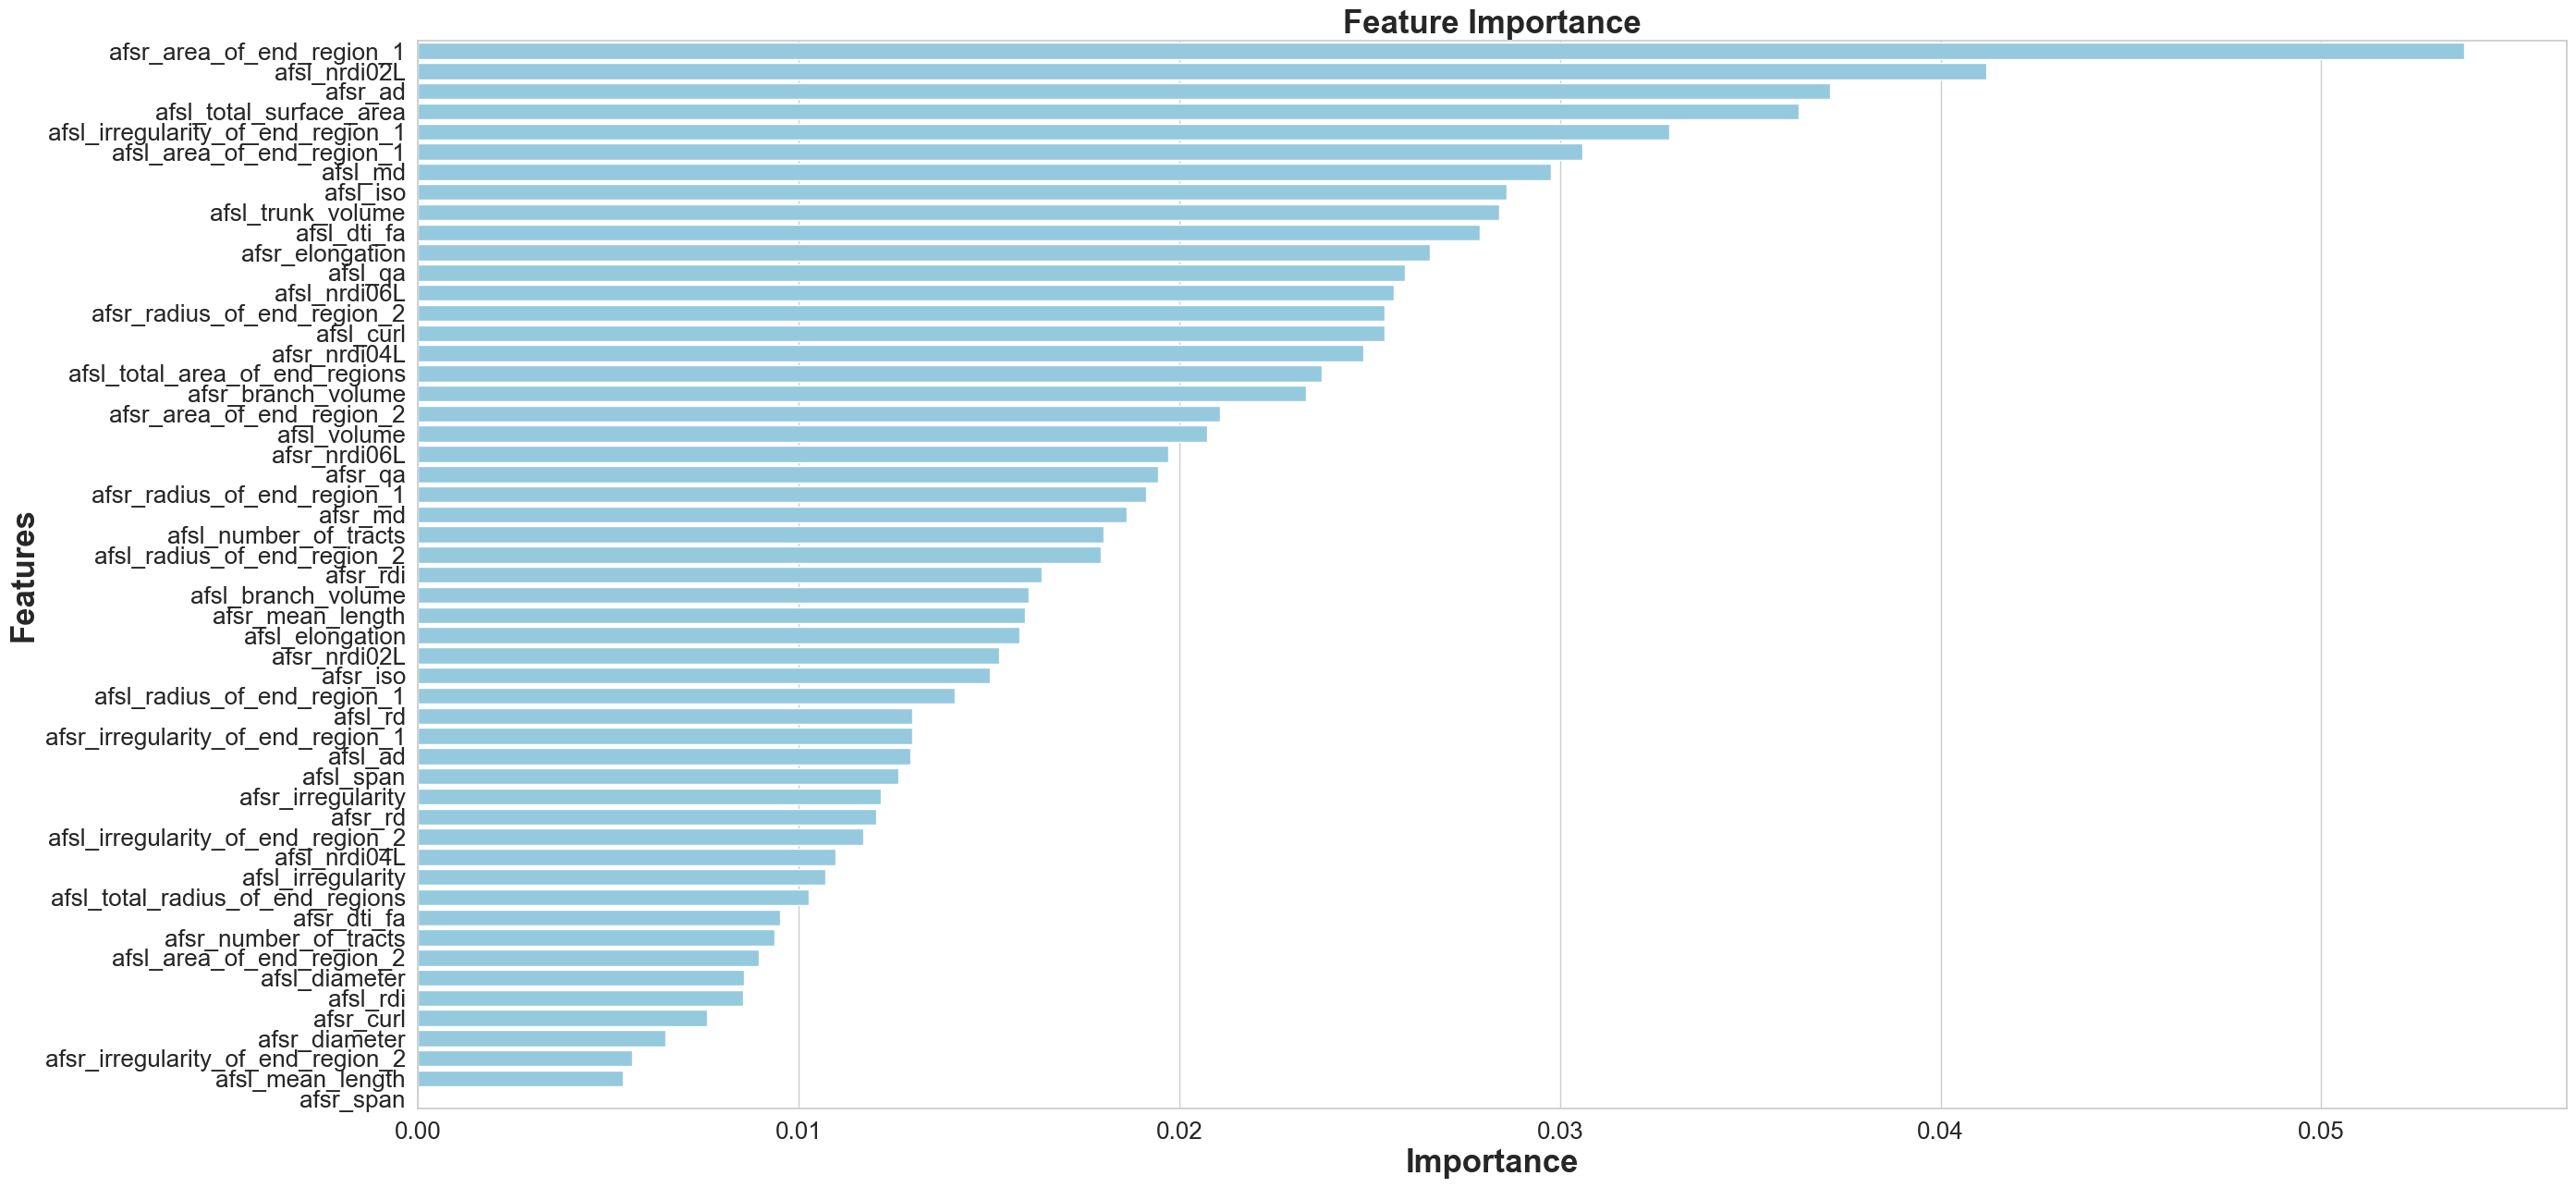

None

,Features,Gini-Importance
0,afsr_area_of_end_region_1,0.053763
1,afsl_nrdi02L,0.041210
2,afsr_ad,0.037086
3,afsl_total_surface_area,0.036271
4,afsl_irregularity_of_end_region_1,0.032880
5,afsl_area_of_end_region_1,0.030589
6,afsl_md,0.029761
7,afsl_iso,0.028600
8,afsl_trunk_volume,0.028400
9,afsl_dti_fa,0.027884


In [190]:
feats = {}
for feature, importance in zip(dfcol.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [198]:
importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Features         53 non-null     object 
 1   Gini-Importance  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# instanciemos el modelo y entremoslo en el conjunto de autos
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
arbol.fit(X_test_scaled_pca,y_train)
accuracy_score(y_train, arbol.predict(X_test_scaled_pca))

In [ ]:
X_test_scaled_pca.shape

(7, 53)